### Texas COVID-19 Data analysis

---

This analysis attempts to fit the COVID case data 
from the Texas Department of State Health Services' website:

https://www.dshs.texas.gov/coronavirus/


The model employed here is the SIR model (Susceptible-Infected-Recovered) model, as described in the following MAA article: 

https://www.maa.org/press/periodicals/loci/joma/the-sir-model-for-spread-of-disease-the-differential-equation-model

The SIR model:

$\qquad\dfrac{ds}{dt} = -bs(t)i(t),$

$\qquad\dfrac{di}{dt} = b s(t) i(t) - k i(t),$

$\qquad\dfrac{dr}{dt} = k i(t)$

$ s(0) = 1,\qquad i(0) = i_0, \qquad r(0) = 0$

The parameters of the system are:

* $b$: average number of population members infected by an infected individual per unit time

* $k$: fraction of the infected group that can recover in a given day

In [42]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#======================================================================
DATA_DIR = './data/'

DATA = {
    'active_cases' : 'TexasCOVID-19ActiveCaseDatabyCounty.xlsx',
    'case_counts' : 'TexasCOVID-19CaseCountDatabyCounty.xlsx',
    'fatality_counts' : 'TexasCOVID-19FatalityCountDatabyCounty.xlsx',
    'legacy_active_cases' : 'TexasCOVID-19LegacyActiveCaseDatabyCounty.xlsx',
    'new_confirmed_cases' : 'TexasCOVID-19NewConfirmedCasesbyCounty.xlsx',
    'new_probable_cases' : 'TexasCOVID-19NewProbableCasesbyCounty.xlsx',
    'probable_cases' : 'TexasCOVID-19ProbableCasesbyCounty.xlsx',
}

DEFAULT_COUNTY = 'McLennan'

# date of first data point (hardcoded by dataset):
DATA_START_DATES = {
    'active_cases' :        np.datetime64('2020-12-11'),
    'legacy_active_cases' : np.datetime64('2020-04-07'),
    'case_counts' :         np.datetime64('2020-03-04'),
    
}



#=======================================================================

def load_active_cases(county=DEFAULT_COUNTY):
    # import couty of interest data
    new_coi_data = pd.read_excel(DATA_DIR + DATA['active_cases'], index_col=None, header=2) \
        .query(f'County == \'{county}\'')

    # import county of interest legacy data:
    leg_coi_data = pd.read_excel(DATA_DIR + DATA['legacy_active_cases'], index_col=None, header=2) \
        .query(f'County == \'{county}\'')

    # trim datasets:
    new_coi_y = new_coi_data.to_numpy()[0,2:]
    leg_coi_y = leg_coi_data.to_numpy()[0,2:]
    coi_y = np.concatenate((leg_coi_y, new_coi_y))

    # initialize date ranges:
    start_t = DATA_START_DATES['legacy_active_cases']
    end_t = start_t + np.timedelta64(len(coi_y), 'D')
    coi_t = np.arange(start_t, end_t, dtype='datetime64[D]')

    # return (dates, # of active cases)
    return (coi_t, coi_y)

def load_case_counts(county=DEFAULT_COUNTY):
    # import county of interest data:
    coi_data = pd.read_excel(DATA_DIR + DATA['case_counts'], index_col=None, header=2) \
        .query(f'`County Name` == \'{county}\'')
    coi_y = coi_data.to_numpy()[0,1:]
    
    # initialize data ranges:
    start_t = DATA_START_DATES['case_counts']
    end_t = start_t + np.timedelta64(len(coi_y), 'D')
    coi_t = np.arange(start_t, end_t, dtype='datetime64[D]')

    # return (dates, case counts)
    return (coi_t, coi_y)

def load_
    

/shared/colin/git/tx_covid_models/env/lib/python3.8/site-packages/openpyxl/styles/stylesheet.py:214: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


# of days tracked:  322


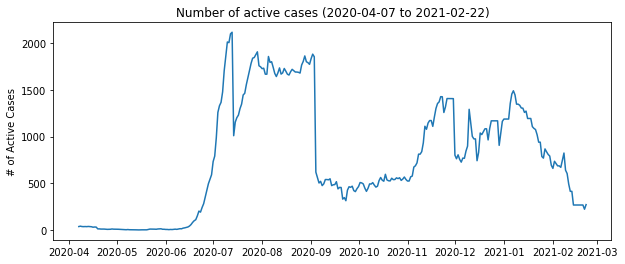

In [43]:
# load active cases:
coi_t, coi_y = load_active_cases()

# indicate $ of data points:
print('# of days tracked: ', len(coi_t))

# plot active cases:
plt.figure(figsize=(10,4))
plt.ylabel('# of Active Cases')
plt.title(f'Number of active cases ({coi_t[0]} to {coi_t[-1]})')
plt.plot(coi_t, coi_y)
plt.show()

/shared/colin/git/tx_covid_models/env/lib/python3.8/site-packages/openpyxl/styles/stylesheet.py:214: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


# of days tracked:  355


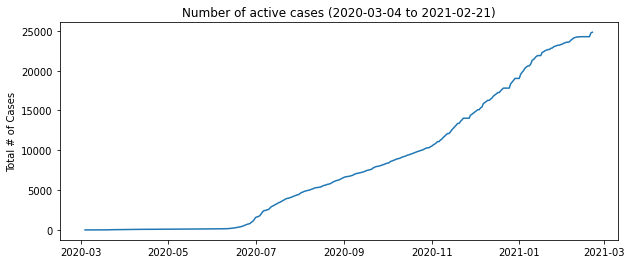

In [47]:
# load total cases:
coi_t, coi_y = load_case_counts()

# indicate $ of data points:
print('# of days tracked: ', len(coi_t))

# plot active cases:
plt.figure(figsize=(10,4))
plt.ylabel('Total # of Cases')
plt.title(f'Number of active cases ({coi_t[0]} to {coi_t[-1]})')
plt.plot(coi_t, coi_y)
plt.show()

